#                        Data Management project - 604
                        
##                             Prof. Dr Sarika Rajeev
                        
#         Team Members:

### Abhishek Goud Thamatam (TF53379)
### Anji Jeshavath (BA74692)
### Charishma Puli (TE58611)
### Rohith Challa (ZI04298)
### Sunilkumar Thyavanahalli Sathyanarayana (CB25538)

                        
                        
        

In [1]:
import sqlite3
conn = sqlite3.connect('heart_risk.db')
c = conn.cursor()

In [2]:
import pandas as pd

In [3]:
c.execute('''SELECT name FROM sqlite_master''').fetchall()

[('framingham',)]

In [4]:
se = pd.read_sql('''select * from framingham''',conn)

In [5]:
se.shape

(4240, 16)

In [6]:
se.dtypes

Gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
se.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
#importing the required libraries
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.svm import SVC
#Accuracy Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Null Value Imputation:

In [9]:
se.isna().sum()
null = se[se.isna().any(axis=1)]
null.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0


In [10]:
se.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Filling the null values or removing them:

In [11]:
se['cigsPerDay']=se['cigsPerDay'].fillna(1)
se['BPMeds']=se['BPMeds'].fillna(1)
se['glucose']=se['glucose'].fillna(method='bfill',axis=0)
se['BMI']=se['BMI'].fillna(method='bfill',axis=0)
se['BMI']=se['BMI'].fillna(method='bfill',axis=0)
se['totChol']=se['totChol'].fillna(method='ffill',axis=0)
se['heartRate']=se['heartRate'].fillna(method='ffill',axis=0)
dt=se.dropna()
dt.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
dt.describe()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000
mean,0.427328,49.552358,1.979444,0.494800,8.980411,0.042080,0.006046,0.311245,0.025635,236.660218,132.369287,82.876663,25.778525,75.920435,82.016445,0.151874
std,0.494750,8.562421,1.019791,0.500033,11.905646,0.200796,0.077530,0.463059,0.158062,44.190547,22.075401,11.952176,4.078006,12.047869,23.799522,0.358942
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.750000,89.500000,27.990000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Exploratory Data Analysis:


0    4029
1     106
Name: diabetes, dtype: int64

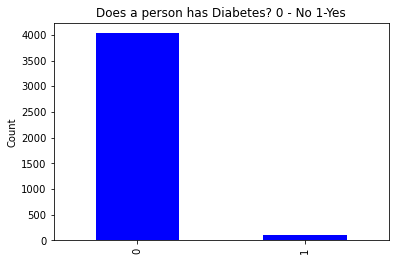

In [13]:
dt.diabetes.value_counts().plot(kind="bar",color='blue')
plt.title("Does a person has Diabetes? 0 - No 1-Yes")
plt.ylabel("Count")
dt.diabetes.value_counts()

0    2089
1    2046
Name: currentSmoker, dtype: int64

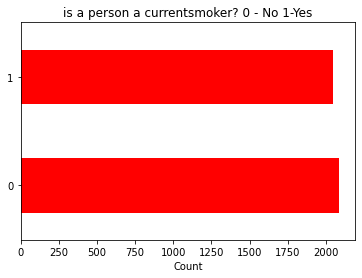

In [14]:
dt.currentSmoker.value_counts().plot(kind="barh",color='red')
plt.title("is a person a currentsmoker? 0 - No 1-Yes")
plt.xlabel("Count")
dt.currentSmoker.value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


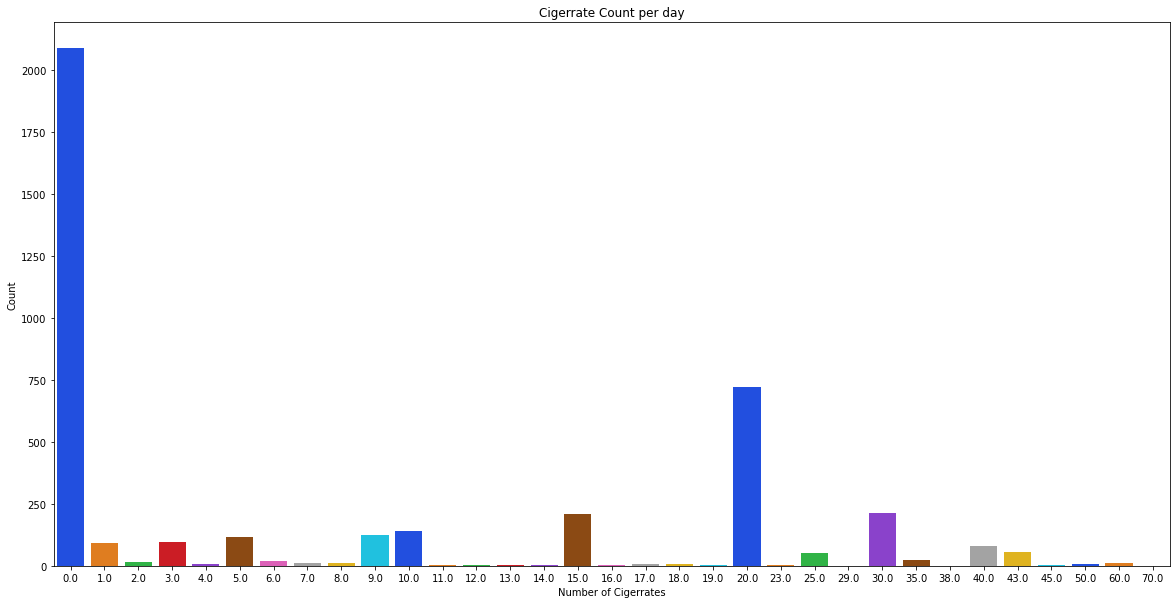

In [15]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(dt['cigsPerDay'],palette='bright')
plt.xlabel("Number of Cigerrates")
plt.ylabel("Count")
plt.title("Cigerrate Count per day")
dt.cigsPerDay.value_counts()
plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)

0    4110
1      25
Name: prevalentStroke, dtype: int64

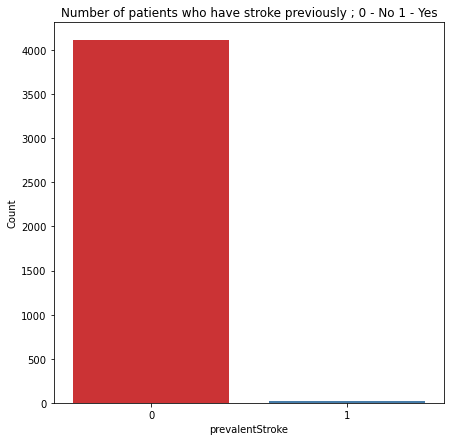

In [16]:
plt.rcParams["figure.figsize"] =7,7
sns.countplot(x=dt["prevalentStroke"],palette="Set1")
plt.ylabel("Count")
plt.title("Number of patients who have stroke previously ; 0 - No 1 - Yes")
dt.prevalentStroke.value_counts()

0    3507
1     628
Name: TenYearCHD, dtype: int64

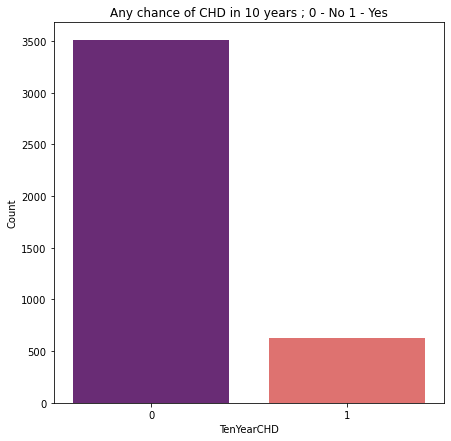

In [17]:
plt.rcParams["figure.figsize"] = 7,7
sns.countplot(x=dt["TenYearCHD"],palette="magma")
plt.ylabel("Count")
plt.title("Any chance of CHD in 10 years ; 0 - No 1 - Yes")
dt.TenYearCHD.value_counts()

0    2368
1    1767
Name: Gender, dtype: int64

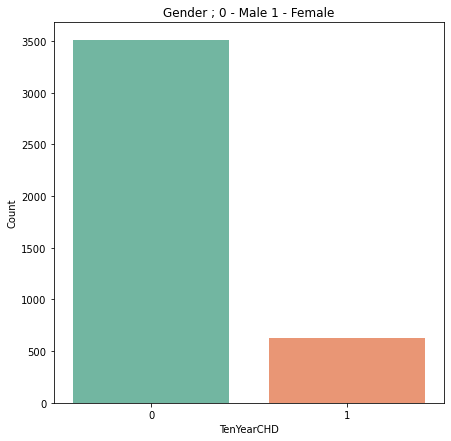

In [18]:
plt.rcParams["figure.figsize"] = 7,7
sns.countplot(x=dt["TenYearCHD"],palette="Set2")
plt.ylabel("Count")
plt.title("Gender ; 0 - Male 1 - Female")
dt.Gender.value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

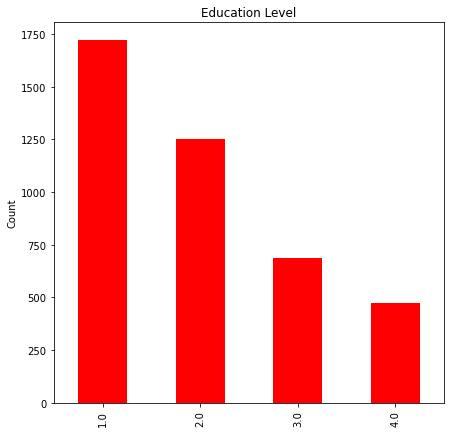

In [19]:

dt.education.value_counts().plot(kind="bar",color='red')
plt.title("Education Level")
plt.ylabel("Count")
dt.education.value_counts()

# Bivariate Analysis:

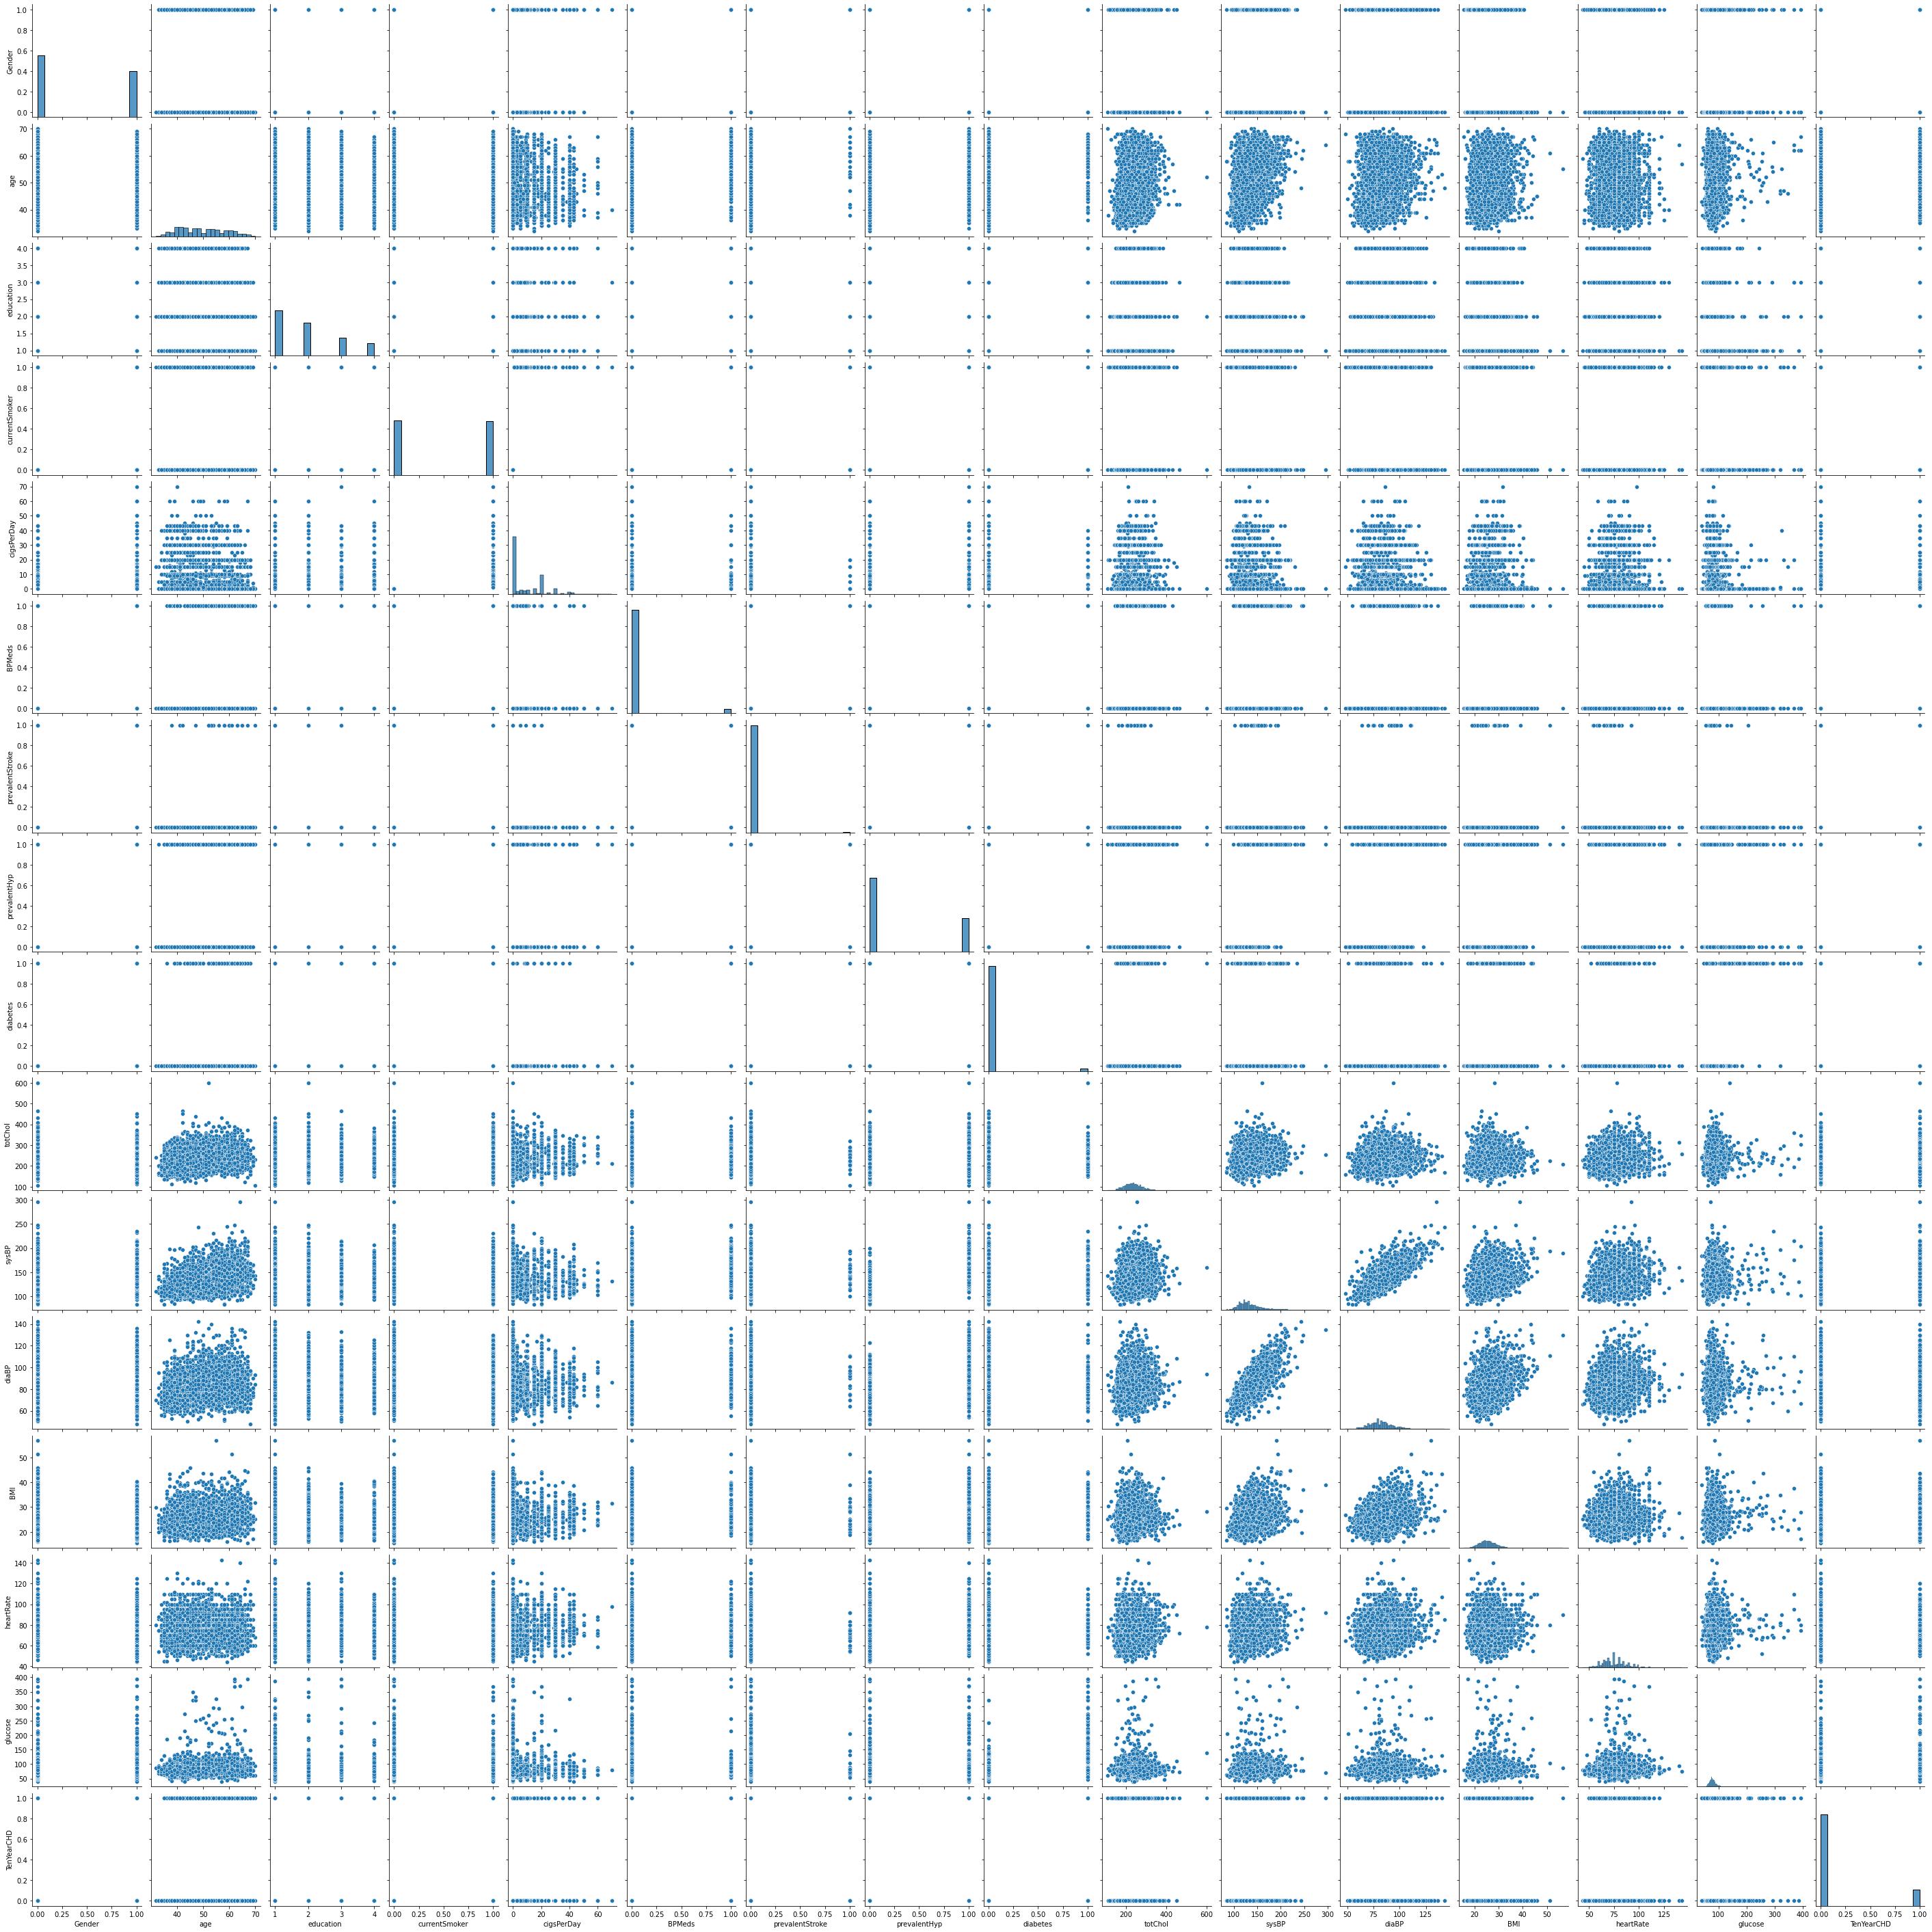

In [20]:
sns.pairplot(dt)

<AxesSubplot:xlabel='cigsPerDay', ylabel='diaBP'>

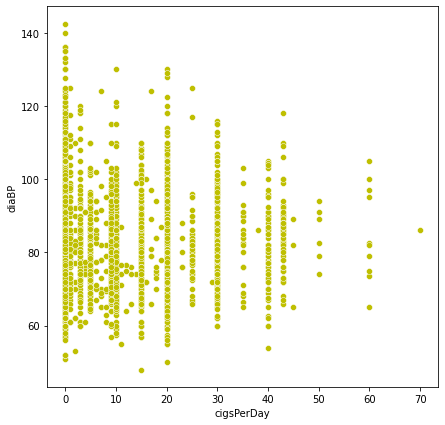

In [21]:
sns.scatterplot(x="cigsPerDay",y="diaBP",data=dt,color='y',legend='full')


<AxesSubplot:xlabel='cigsPerDay', ylabel='sysBP'>

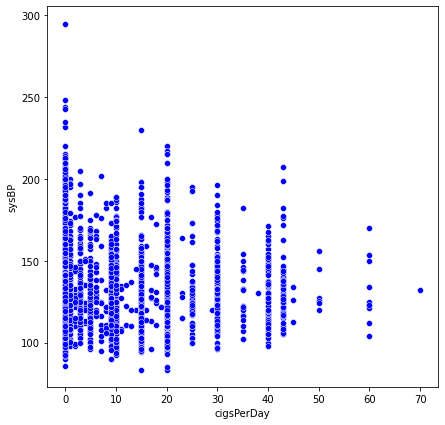

In [22]:
sns.scatterplot(x="cigsPerDay",y="sysBP",data=dt,color='b',legend='full')


<AxesSubplot:xlabel='cigsPerDay', ylabel='BMI'>

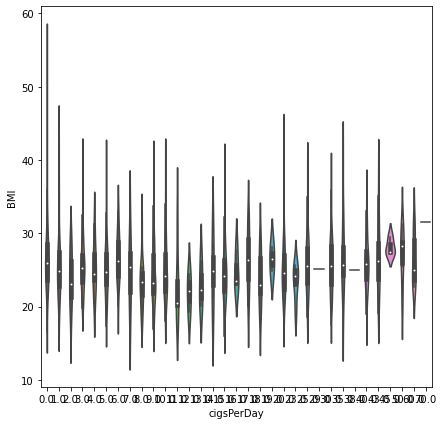

In [23]:
sns.violinplot(x="cigsPerDay",y="BMI",data=dt)

<AxesSubplot:xlabel='cigsPerDay', ylabel='TenYearCHD'>

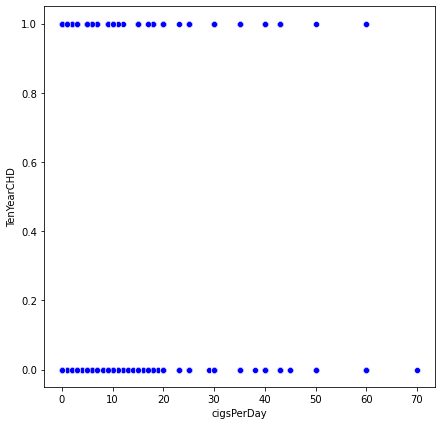

In [24]:
sns.scatterplot(x="cigsPerDay",y="TenYearCHD",data=dt,color='b',legend='full')

<AxesSubplot:xlabel='cigsPerDay', ylabel='glucose'>

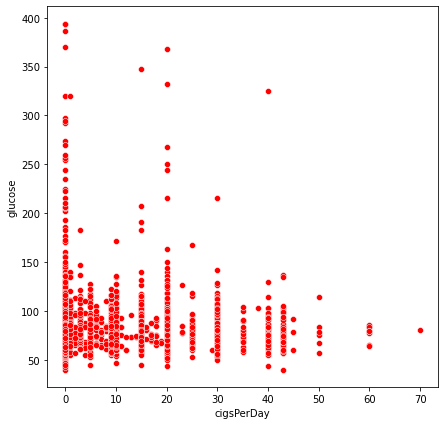

In [25]:
sns.scatterplot(x="cigsPerDay",y="glucose",data=dt,color='r',legend='full')

<AxesSubplot:xlabel='cigsPerDay', ylabel='heartRate'>

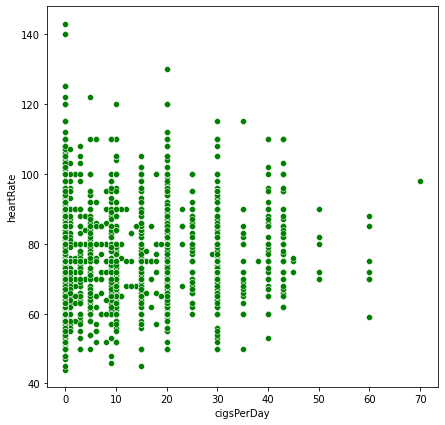

In [26]:
sns.scatterplot(x="cigsPerDay",y="heartRate",data=dt,color='g',legend='full')

<AxesSubplot:xlabel='cigsPerDay', ylabel='totChol'>

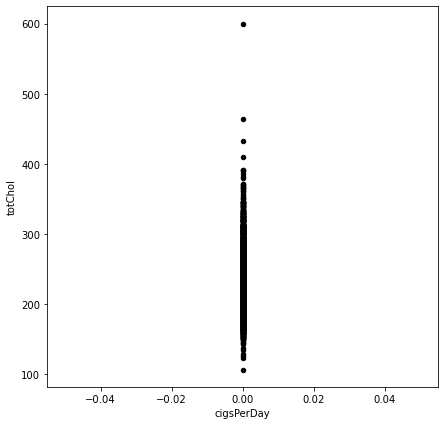

In [27]:
dt[dt['currentSmoker']==0].plot.scatter(x="cigsPerDay",y="totChol",color='k')

<AxesSubplot:xlabel='cigsPerDay', ylabel='totChol'>

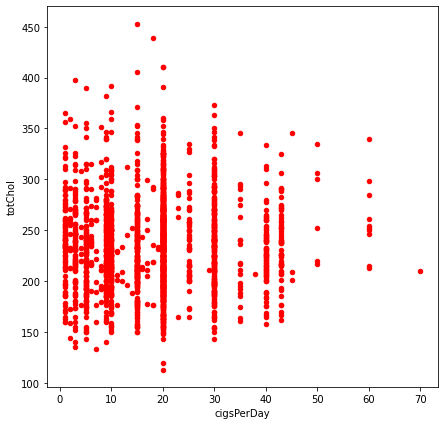

In [28]:
dt[dt['currentSmoker']==1].plot.scatter(x="cigsPerDay",y="totChol",color='r')

<AxesSubplot:xlabel='currentSmoker', ylabel='totChol'>

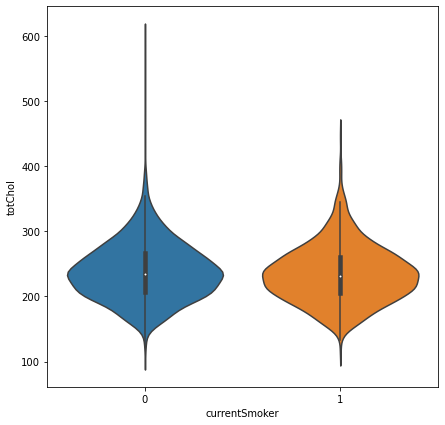

In [29]:
sns.violinplot(x='currentSmoker',y='totChol',data=dt)

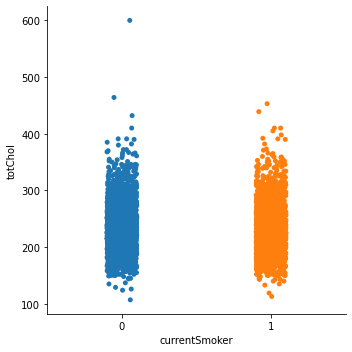

In [30]:
sns.catplot(x="currentSmoker",y="totChol",data=dt)

<AxesSubplot:xlabel='currentSmoker', ylabel='sysBP'>

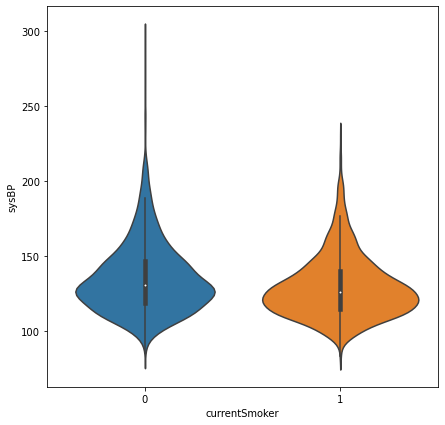

In [31]:
sns.violinplot(x="currentSmoker",y="sysBP",data=dt)

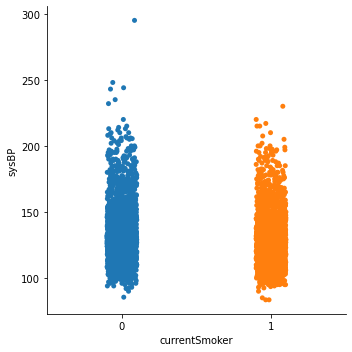

In [32]:
sns.catplot(x="currentSmoker",y="sysBP",data=dt)

<AxesSubplot:xlabel='currentSmoker', ylabel='glucose'>

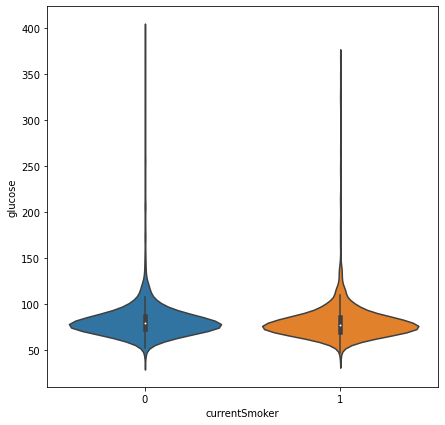

In [33]:
sns.violinplot(x='currentSmoker',y='glucose',data=dt)

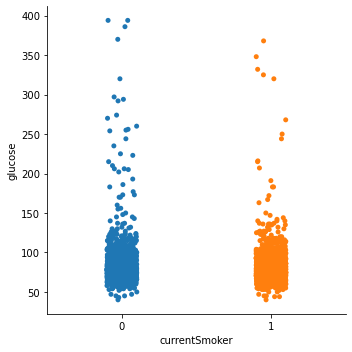

In [34]:
sns.catplot(x="currentSmoker",y="glucose",data=dt)

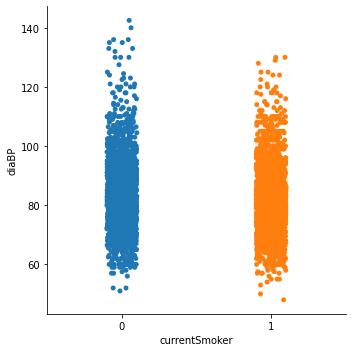

In [35]:
sns.catplot(x="currentSmoker",y="diaBP",data=dt)

<AxesSubplot:xlabel='currentSmoker', ylabel='diaBP'>

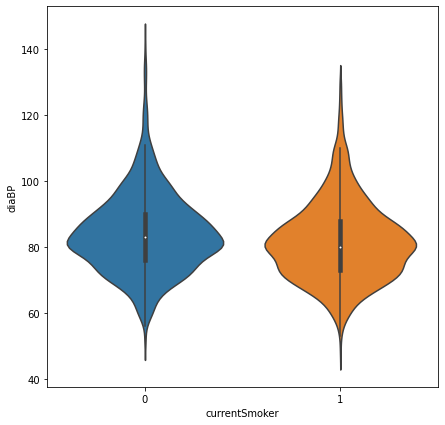

In [36]:
sns.violinplot(x='currentSmoker',y='diaBP',data=dt)

# OBSERVATIONS:

-By plotting graphs wrt to number of cigarettes per day and how it affects the health issues we are not able to find any relevence.

* In  Total Cholestrol(totChol) section , many non smokers lie between 100 to 400 chol while smokers lie between the same 100 to 400 when they smoke 10 to 70 cigarettes per day. This implies that tot chol is not dependent on the number of cigarettes entirely. it depends on how the person maintains his fat consumption and his exercise. In the nonsmoker case we have one person having a total chol at 600 and a smoker having chol at 700. This can state that they are obese.

* Those who are smokers and non smokers have similar heart rate but people who smoke more than 50 cigs a day have a decrease in their heart rate. The non smokers have a perfectly healthy heartrate.

* In the sysBP section we can see that a non smoker group has sysBP till 250while a smoker has comparitively lesser amount. We a know that smoking causes acute increase of BP and sometimes low bp too. we can say here for the fact that smokers have comparitively lower amount of BP than non smokers. Same can be said for diaBP too.

* The glucose amount in non smokers are alot. when it comes to smokers their glucose amount is limitted to 150 which is normal. Certain non smokers have glucose level upto 400 stating they are having sugar problems.





# Distribution Plot:

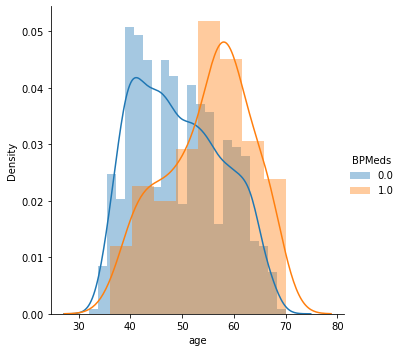

In [37]:
sns.FacetGrid(se,hue = "BPMeds",height = 5).map(sns.distplot,"age").add_legend()
warnings.simplefilter(action='ignore', category=FutureWarning)

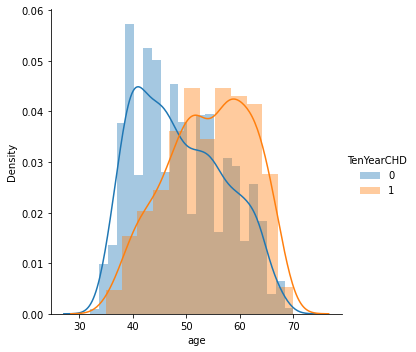

In [38]:
sns.FacetGrid(se,hue = "TenYearCHD",height = 5).map(sns.distplot,"age").add_legend()
warnings.simplefilter(action='ignore', category=FutureWarning)

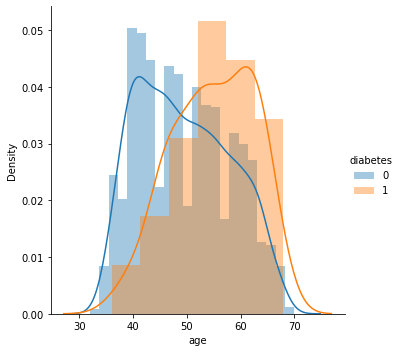

In [39]:
sns.FacetGrid(se,hue = "diabetes",height = 5).map(sns.distplot,"age").add_legend()
warnings.simplefilter(action='ignore', category=FutureWarning)

# Multivariate:

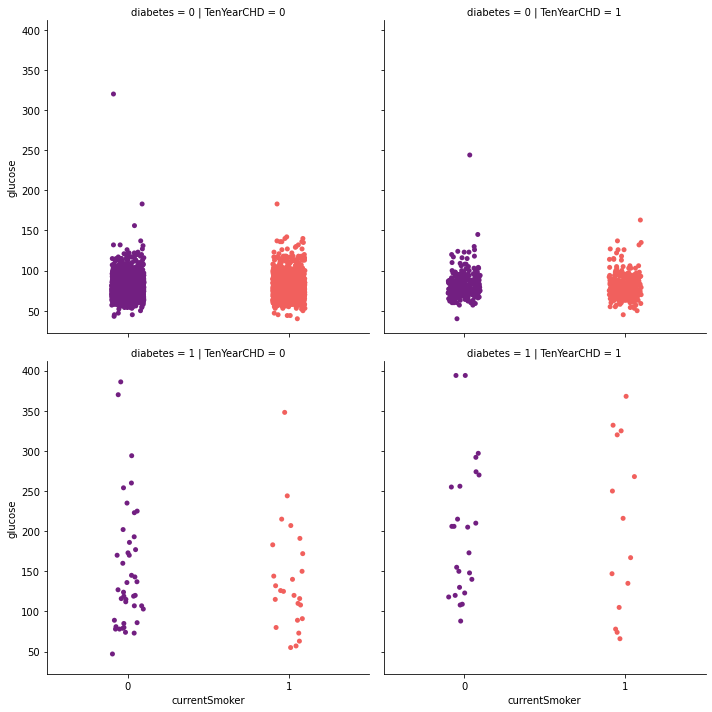

In [40]:
## MUltivariate 
sns.catplot(y="glucose",x="currentSmoker",data=dt,col="TenYearCHD",row='diabetes',palette="magma")

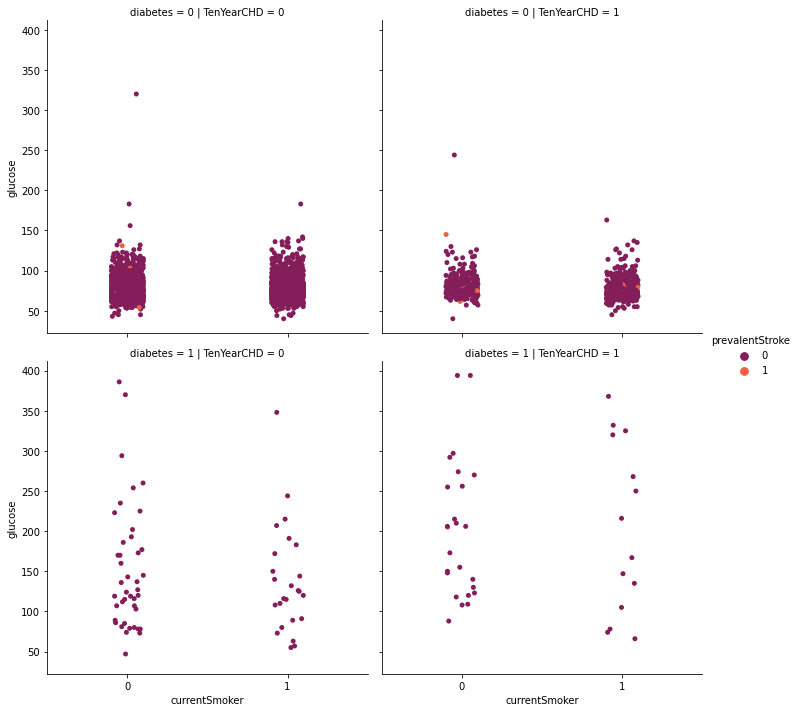

In [41]:
## MUltivariate 
sns.catplot(y="glucose",x="currentSmoker",data=dt,col="TenYearCHD",row='diabetes',hue='prevalentStroke',palette="rocket")

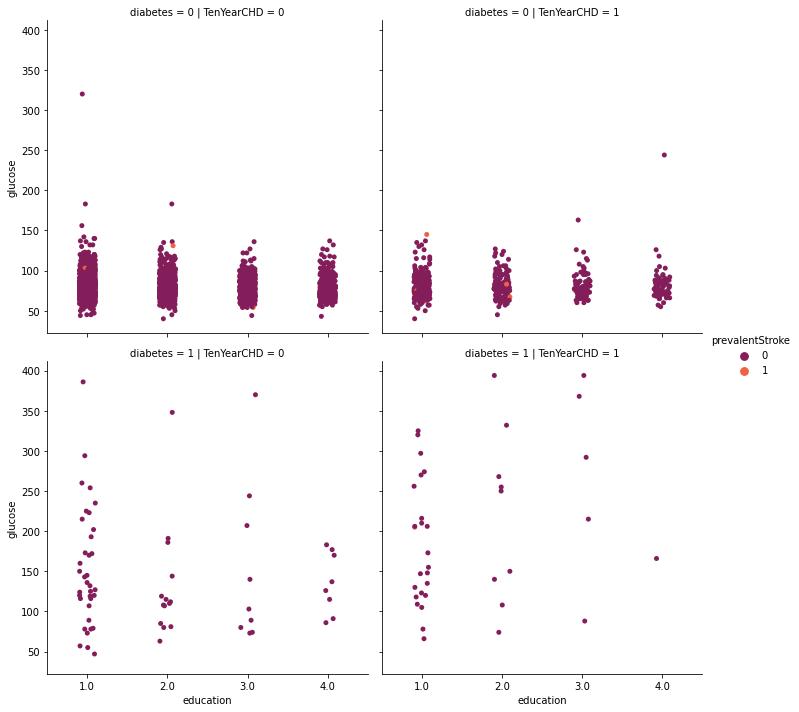

In [42]:
## MUltivariate 
sns.catplot(y="glucose",x="education",data=dt,col="TenYearCHD",row='diabetes',hue='prevalentStroke',palette="rocket")

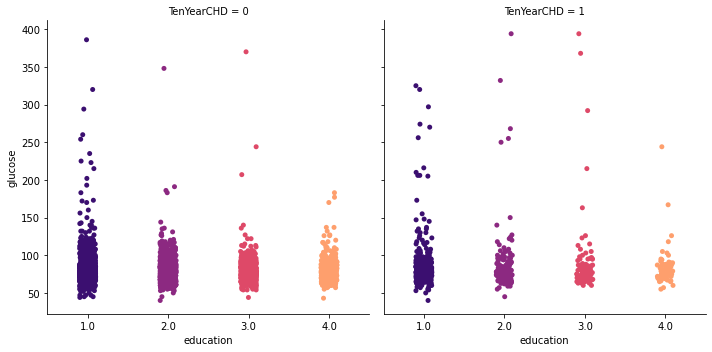

In [43]:
## MUltivariate 
sns.catplot(y="glucose",x="education",data=dt,col="TenYearCHD",palette="magma")

# Inferences:
* Patients who have diabetes have the risk of CHD mostly between the age of 35 to 50 and those who donot have the risk most in the age limit of 55 years. Those who have diabetes have a slight higher risk in these age limits.
* Patients who take BP meds mostly are at the risk in the age between 55 to 65 years and those who donot have the danger in the in the age between 40 to 50 years.
* Male patients have CHD mostly in the age between 35 to 55 whereas female patients have CHD in the age  between 45 to 65 years. And female patients have less frequency then the other in these ages.
* The glucose level of a non-smoker and smoker has no diabetes and has no risk for CHD is seen between 50-100 and the same for person who is a smoker and non-smoker who has no diabetes and has a risk of CHD is seen between 75-125

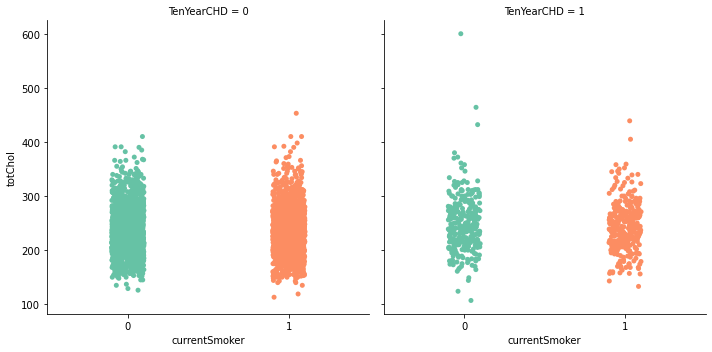

In [44]:
## multivariate analysis
sns.catplot(y="totChol",x="currentSmoker",data=dt,col="TenYearCHD",palette="Set2")

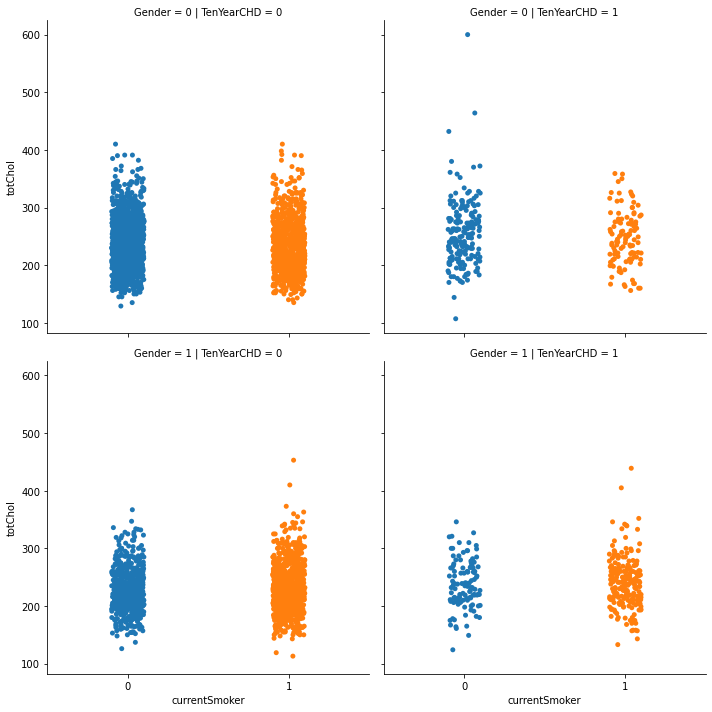

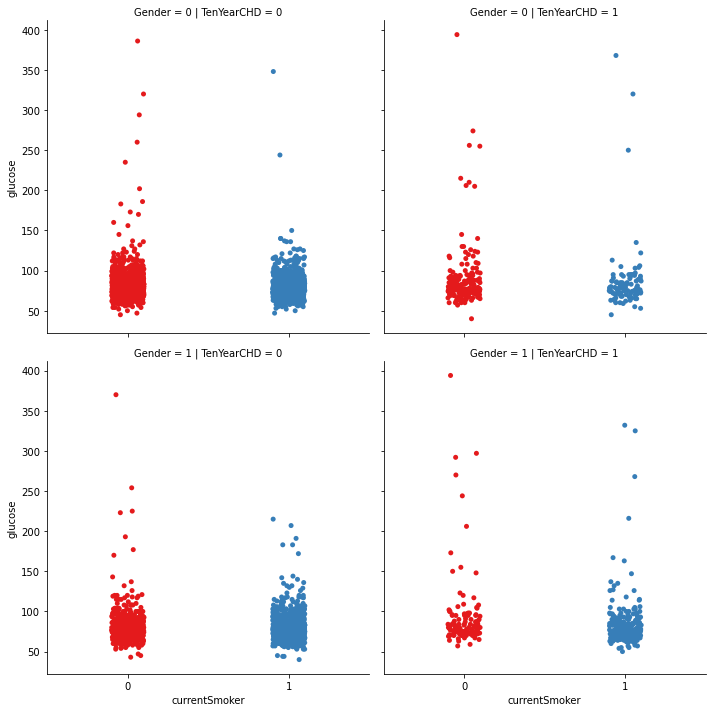

In [45]:
## multivariate analysis
sns.catplot(y="totChol",x="currentSmoker",data=dt,col="TenYearCHD",row='Gender')
sns.catplot(y="glucose",x="currentSmoker",data=dt,col="TenYearCHD",row='Gender',palette="Set1")

# Inferences:

* The cholestrol level seems to be high if he/she is a smoker and if he has no risk of TenYearCHD
* The risk of TenyearCHD is less if the patient is non smoker and male and they have a cholestrol level between 150 - 350 and glucose level between 50 - 125.
* The risk of CHD is more if the patient is non smoker and male and they have a cholestrol level between 150 - 300 and glucode level between 50 - 100.

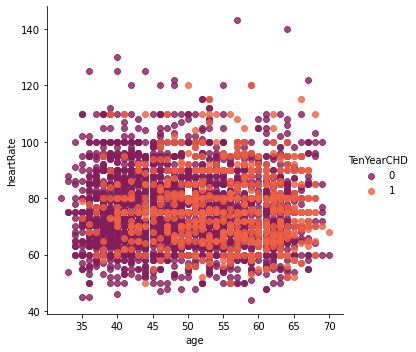

In [46]:
sns.lmplot("age","heartRate",se,hue="TenYearCHD",fit_reg=False,palette="rocket")
warnings.simplefilter(action='ignore', category=FutureWarning)

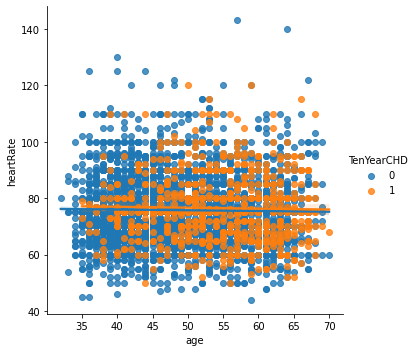

In [47]:
sns.lmplot("age","heartRate",se,hue="TenYearCHD",fit_reg=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Inference:

* People with Higher healthy heart rates have lower chances to have heart disease.
* People who are above the age 50 have high risks of having heart disease

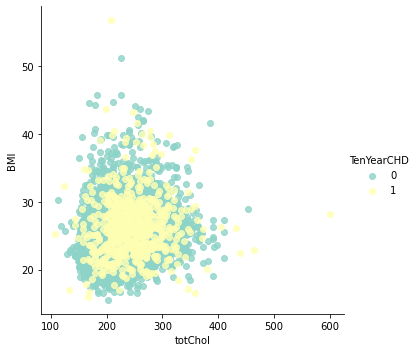

In [48]:
sns.lmplot("totChol","BMI",dt,hue="TenYearCHD",fit_reg=False,palette="Set3")
warnings.simplefilter(action='ignore', category=FutureWarning)

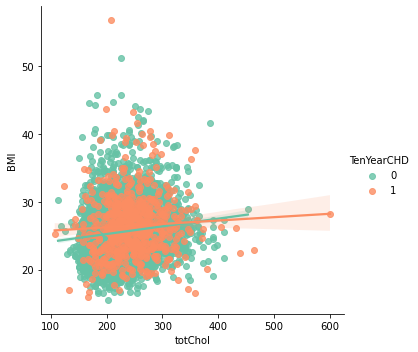

In [49]:
sns.lmplot("totChol","BMI",dt,hue="TenYearCHD",fit_reg=True,palette="Set2")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Inference:

* From the above graph, we can observe that male Current smokers are higher and Cigarettes consumed per day by them is also comparitively high. So, the risk factor for male to get heart disease is high.

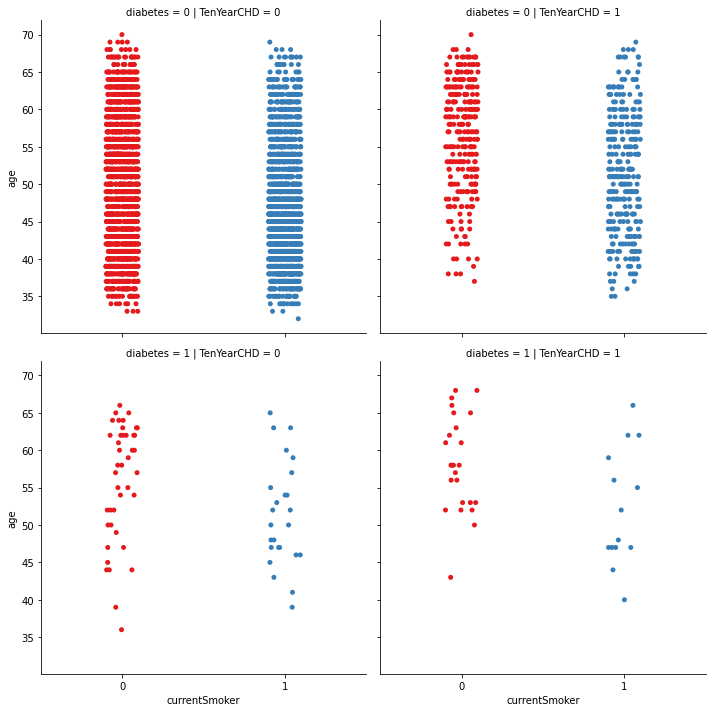

In [50]:
## MUltivariate 
sns.catplot(y="age",x="currentSmoker",data=dt,col="TenYearCHD",row='diabetes',palette="Set1")

# Inferences:
* People with no CHD as non-smokers, no diabetis and those who have the risk of CHD are usually smokers non-diabetic and range widely from the age 35 - 70. The other sections of people are less and scattered all around the age range.

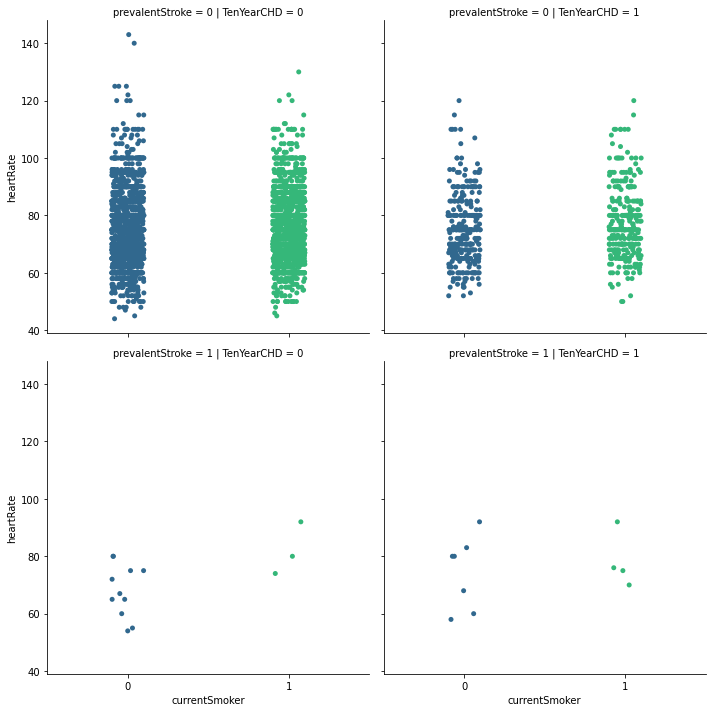

In [51]:
## MUltivariate 
sns.catplot(y="heartRate",x="currentSmoker",data=dt,col="TenYearCHD",row='prevalentStroke',palette="viridis")

Number of people with CHD and with higher Heart Rate
 0    85
1    20
Name: TenYearCHD, dtype: int64


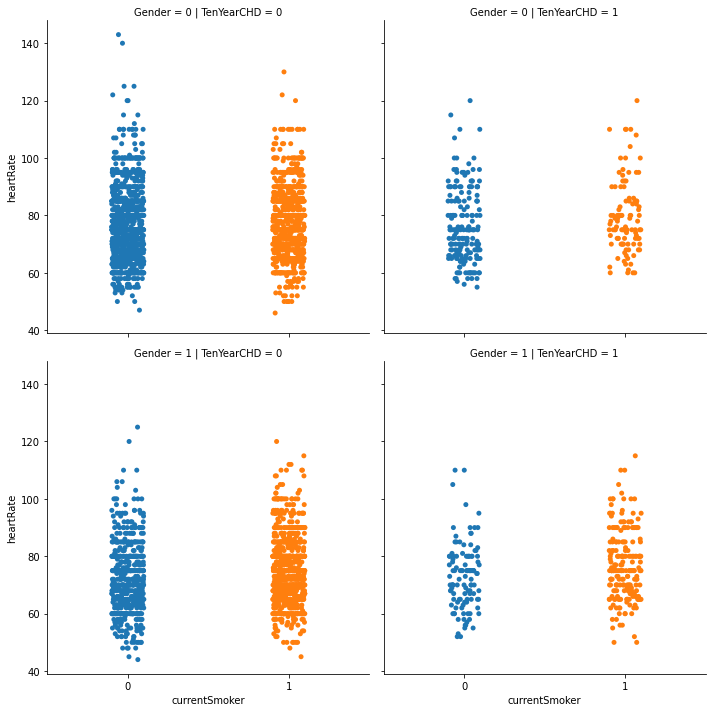

In [52]:
## MUltivariate 
sns.catplot(y="heartRate",x="currentSmoker",data=dt,col="TenYearCHD",row='Gender')
print("Number of people with CHD and with higher Heart Rate\n",se[se['heartRate']>100]['TenYearCHD'].value_counts())

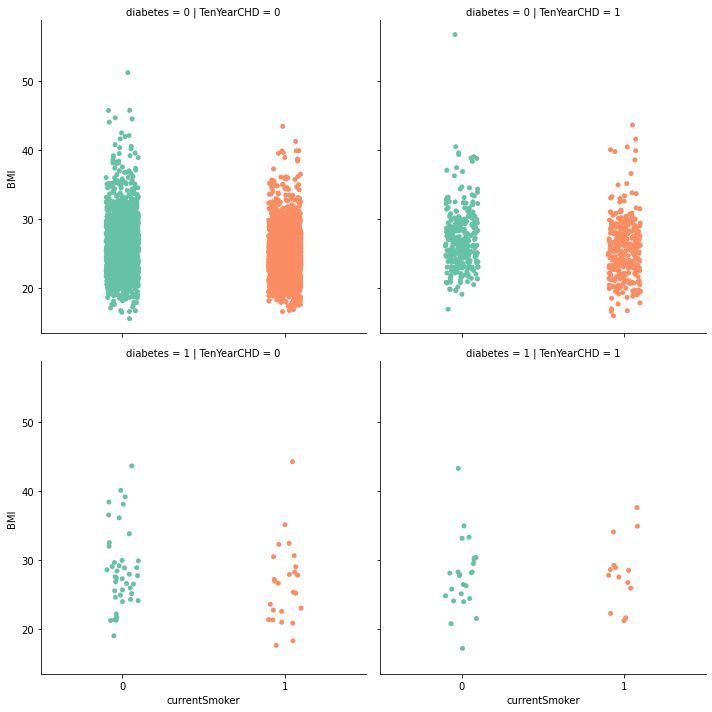

In [53]:
sns.catplot(y="BMI",x="currentSmoker",data=dt,col="TenYearCHD",row='diabetes',palette="Set2")

# Inferences :
* The patients with a HR of 40-100 and smokers/non-smokers also no prelevant stroke have less chance of CHD.
* With a HR of 50-100 the risk of CHD is less.Smokers and females greater at risk who have a wide range of HR.
* Non-smokers, non-diabetic who have less chance of CHD have a BMI of 20-35.

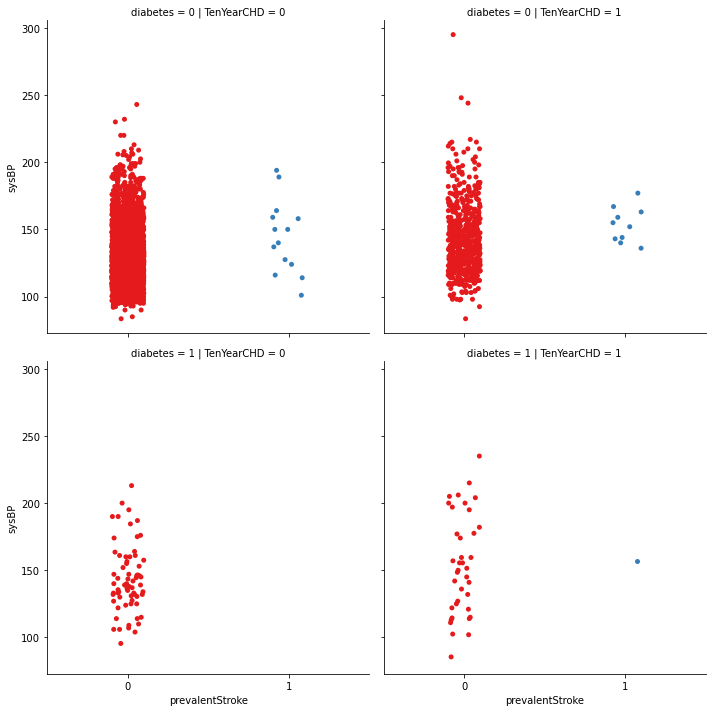

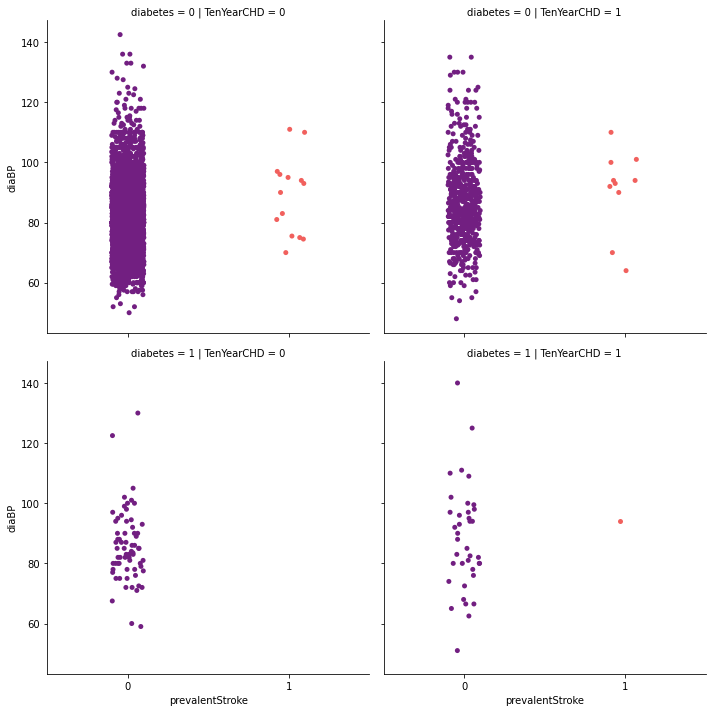

In [54]:
sns.catplot(y="sysBP",x="prevalentStroke",data=dt,col="TenYearCHD",row='diabetes',palette="Set1")
sns.catplot(y="diaBP",x="prevalentStroke",data=dt,col="TenYearCHD",row='diabetes',palette="magma")

# Conclusions:
* Even though it seems heart disease is more frequent in people with lower level of education, it is not the complete fact. Number of sample in other levels is smaller. So, we need to another way to compare the relation. As a matter of fact it has not much to do with CHD.
* Women are slightly more proned to have heart dieseases with other health conditions than men although women are less in count have not having CHD then men as well. This slight indifference can be ignored.
* Even though we think smokers are in big risk of CHD, data analysis says the difference is not that big. By looking at rate, we can see that percantage difference is only around 1%. Hence, smoking is not a very helpful attribute to detect CHD but cigsPerDay can be helpful attribute to detect CHD.
* People on BP medicine are more likely to have CHD in future than people who are not on medication of BP
* Diabetic patients are more in risk than non-diabetic patients.
* The data shows that people without CHD and with CHD are closer to being overweight in average. But without CHD people are close to normal BMI rate, which indicates BMI is a good indicator of health and CHD.
* People with higher sysBP level are more likely to develop 10year CHD.
* People with higher diaBP level are more likely to develop 10year CHD.
* People with higher Cholesterol level are more likely to develop 10year CHD.
* The final conclusion is that male or female, better in education or not better in education, who comsume more cigsPerday , who are on BP medicine,have high cholestrol,high sysBP and diaBP, and higher BMI have higher risk of CHD within the 10 yrs

# Feature Selection

In [55]:
X = dt.iloc[:,0:14] 
y = dt.iloc[:,-1] 

In [56]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [57]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

              Specs       Score
10            sysBP  727.667237
1               age  319.114310
9           totChol  232.140202
4        cigsPerDay  195.617583
11            diaBP  151.550717
7      prevalentHyp   92.061306
8          diabetes   38.412376
5            BPMeds   29.180966
0            Gender   16.692413
6   prevalentStroke   16.112384
12              BMI   13.986826


In [58]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,727.667237
1,age,319.114310
9,totChol,232.140202
4,cigsPerDay,195.617583
11,diaBP,151.550717
7,prevalentHyp,92.061306
8,diabetes,38.412376
5,BPMeds,29.180966
0,Gender,16.692413
6,prevalentStroke,16.112384


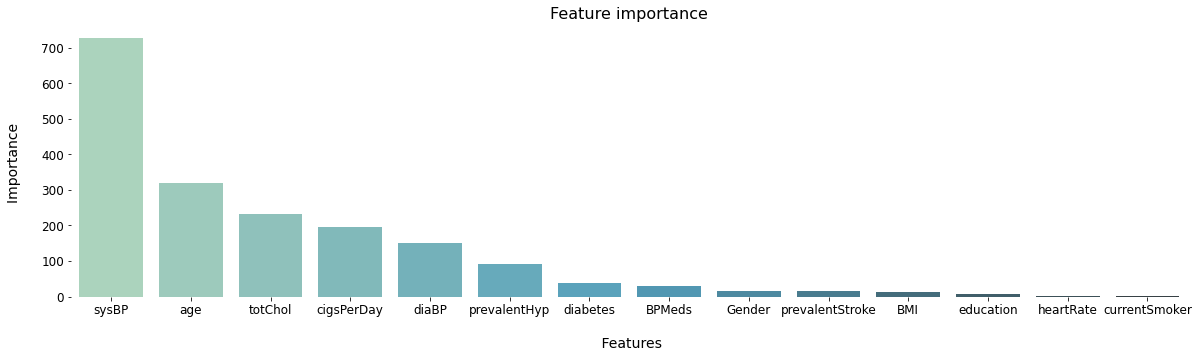

In [59]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [60]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'Gender',
 'prevalentStroke']

In [61]:
df1 = se[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','Gender','TenYearCHD']]
df1.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


# Removing Outliers

In [62]:
Q1 = df1['glucose'].quantile(0.25)
Q3 = df1['glucose'].quantile(0.75)
q1 = df1['totChol'].quantile(0.25)
q3 = df1['totChol'].quantile(0.75)
IQR = Q3 - Q1
iqr = q3 - q1
print(IQR)
print(iqr)
df_new = df1[~((df1['glucose'] < (Q1 - 1.5 * IQR)) |(df1['glucose'] > (Q3 + 1.5 * IQR)))]
df_new1 = df_new[~((df_new['totChol'] < (q1 - 1.5 * iqr)) |(df_new['totChol'] > (q3 + 1.5 * iqr)))]
df_new1.head()

16.0
57.0


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


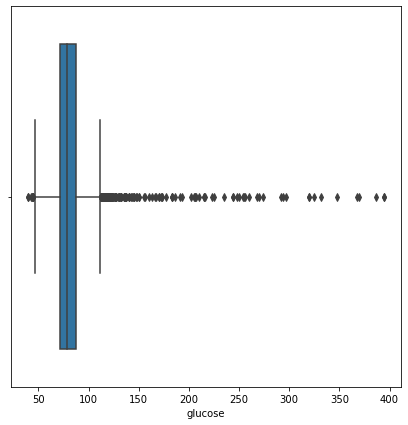

In [63]:
### Before removing the Outliers : 

sns.boxplot(se.glucose)
warnings.simplefilter(action='ignore', category=FutureWarning)

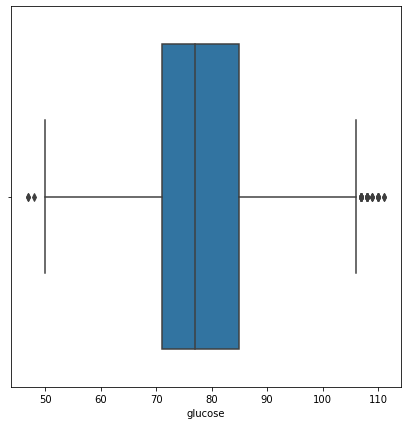

In [64]:
## After removing the Outliers :


sns.boxplot(df_new1.glucose)
warnings.simplefilter(action='ignore', category=FutureWarning)

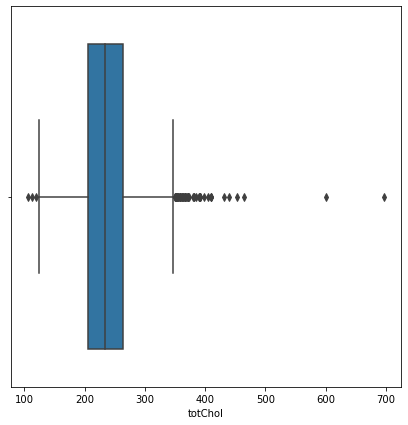

In [65]:
                       ### Before removing the Outliers :


sns.boxplot(se.totChol)
warnings.simplefilter(action='ignore', category=FutureWarning)

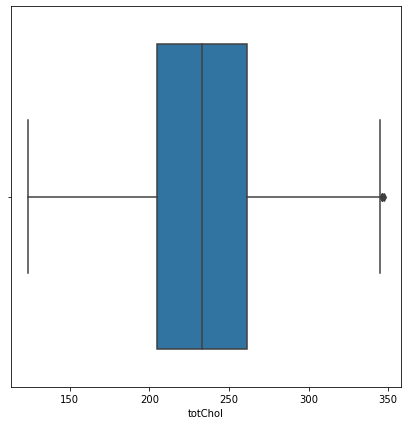

In [66]:
                        ### After removing the Outliers :


sns.boxplot(df_new1.totChol)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [67]:
df_clean = df_new1

#### " df_clean " is the DataFrame with only Important Columns and with No-Null Values and Outliers 

In [68]:
scaler = MinMaxScaler(feature_range=(0,1)) 
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,Gender,TenYearCHD
count,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,0.227339,0.492077,0.456485,0.496233,0.129075,0.366839,0.298842,0.007553,0.039023,0.430514,0.143505
std,0.101483,0.171411,0.224939,0.182628,0.170843,0.124724,0.457808,0.086589,0.193674,0.495210,0.350631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153664,0.375000,0.263158,0.363229,0.000000,0.275132,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.210402,0.468750,0.421053,0.488789,0.000000,0.359788,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.278960,0.593750,0.631579,0.614350,0.285714,0.433862,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Train Test Split**

In [69]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)

In [70]:
print(len(X_train))
print(len(X_test))

2383
1589


## Resampling imbalanced Dataset¶

Class 0: 3402
Class 1: 570
Proportion: 5.97 : 1


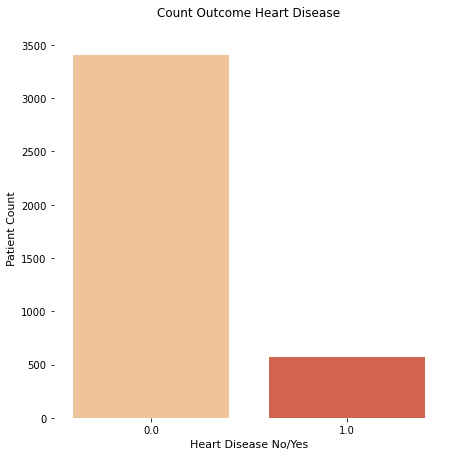

In [71]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')

plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)

We can see that the proportion is 5.97:1 which is not well balanced. One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

**OVERSAMPLING METHOD**<br>
Oversampling aims to increase the number of instances from the underrepresented class in the data set. In our case, these techniques will increase the number of correct transactions in our data . If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the minority class and include them from the data set until we achieve a balance between the majority and minority class.


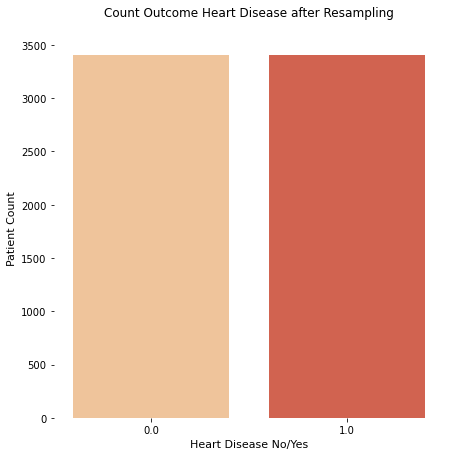

In [72]:

shuffled_df = df_scaled.sample(frac=1,random_state=4)


CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1].sample(n=3402,random_state=42,replace=True)


non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0]

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.show()
warnings.simplefilter(action='ignore', category=FutureWarning)

<b>Again train test split with balanced data</b>

In [73]:
y1 = normalized_df['TenYearCHD']
X1 = normalized_df.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state=29)
print(len(X1_train))
print(len(X1_test))

4082
2722


<h1><span style='color:purple'>MODELING AND  EVALUATION</span></h1>

<h2><b>1.LOGISTIC REGRESSION</b><h2>

In [74]:
normalized_data2_reg = LogisticRegression().fit(X1_train, y1_train)

normalized_data2_reg_pred = normalized_data2_reg.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acclog = accuracy_score(y1_test, normalized_data2_reg_pred)
print(f"The accuracy score for LogReg is: {round(acclog,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1log = f1_score(y1_test, normalized_data2_reg_pred)
print(f"The f1 score for LogReg is: {round(f1log,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionlog = precision_score(y1_test, normalized_data2_reg_pred)
recalllog = recall_score(y1_test, normalized_data2_reg_pred)
print(f"The recall score for LogReg is: {round(recalllog,3)*100}%")
print(f"The precision score for LogReg is: {round(precisionlog,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True 

The accuracy score for LogReg is: 66.2%
The f1 score for LogReg is: 66.10000000000001%
The recall score for LogReg is: 65.8%
The precision score for LogReg is: 66.4%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

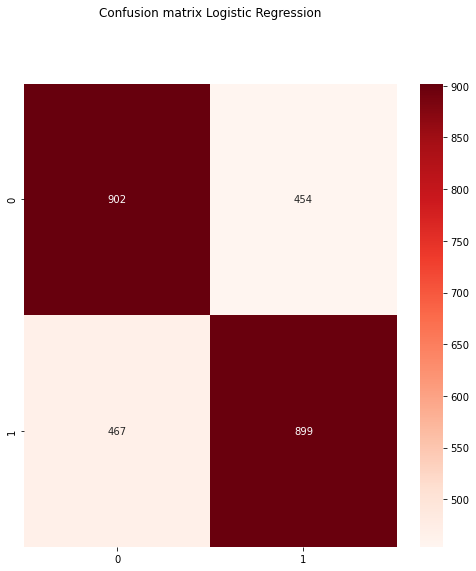

In [75]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y1_test, normalized_data2_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

<h2><b>2.SVM</b><h2>

In [76]:
svm = SVC()

#fit model
svm.fit(X1_train, y1_train)

normalized_data2_svm_pred = svm.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accsvm = accuracy_score(y1_test, normalized_data2_svm_pred)
print(f"The accuracy score for SVM is: {round(accsvm,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1svm = f1_score(y1_test, normalized_data2_svm_pred)
print(f"The f1 score for SVM is: {round(f1svm,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionsvm = precision_score(y1_test, normalized_data2_svm_pred)
print(f"The precision score for SVM is: {round(precisionsvm,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallsvm = recall_score(y1_test, normalized_data2_svm_pred)
print(f"The recall score for SVM is: {round(recallsvm,3)*100}%")

The accuracy score for SVM is: 67.2%
The f1 score for SVM is: 67.80000000000001%
The precision score for SVM is: 66.9%
The recall score for SVM is: 68.7%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

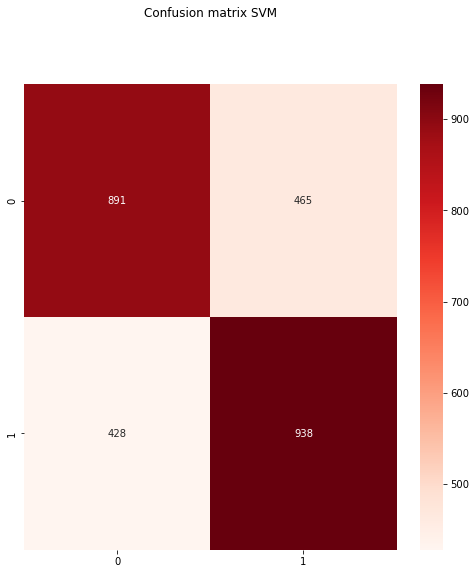

In [77]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y1_test, normalized_data2_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')

plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

# 3.Knn Classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
li=[]
max1=0
li1=range(99,1,-2)
for k_value in range(99,1,-2):
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X1_train, y1_train)
    normalized_df_knn_pred = knn.predict(X1_test)
    f1 = f1_score(y1_test, normalized_df_knn_pred)
    li.append(f1*100)
    #max1=list1[0]
    if(f1>max1):
        max1=f1
value={'k-value':li1,'F1scores':li}
kvalues = pd.DataFrame(value,columns=['k-value','F1scores'])
print('Max. F1 score: %.2f'%(max1*100),'%\n')
print("F1 scores for different values of K")
kvalues

Max. F1 score: 84.18 %

F1 scores for different values of K


,k-value,F1scores
0,99,65.788511
1,97,65.270121
2,95,65.812592
3,93,65.962099
4,91,65.568972
5,89,65.815396
6,87,66.083789
7,85,66.738973
8,83,66.594124
9,81,66.085060


In [80]:
normalized_df_knn_pred = knn.predict(X1_test)
knn_acc = accuracy_score(y1_test, normalized_df_knn_pred)

print(f"The accuracy score for KNN is: {round(knn_acc,3)*100}%")

knn_f1 = f1_score(y1_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(knn_f1,3)*100}%")
knn_recall = recall_score(y1_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(knn_recall,3)*100}%")

The accuracy score for KNN is: 82.5%
The f1 score for KNN is: 84.2%
The recall score for KNN is: 92.7%


In [81]:
acc_test = knn.score(X1_test, y1_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X1_train, y1_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")



The accuracy score of the test data is:  82.51285819250552 %
The accuracy score of the training data is:  90.62 %


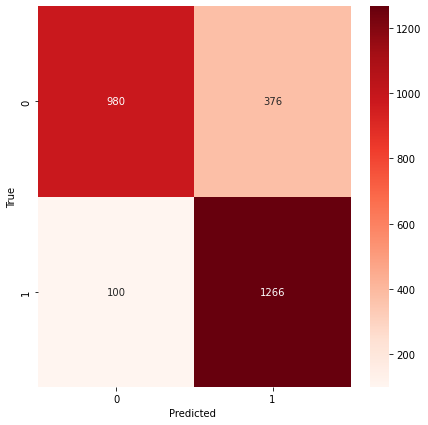

In [82]:
cnf_matrix_knn = confusion_matrix(y1_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

<h2>4.Decision Tree Classifiaction</h2>

In [83]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X1_train, y1_train)

normalized_data2_dtc_pred = dtc_up.predict(X1_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accdt = accuracy_score(y1_test, normalized_data2_dtc_pred)
print(f"The accuracy score for DecisionTreeClassifier is: {round(accdt,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1dt = f1_score(y1_test, normalized_data2_dtc_pred)
print(f"The f1 score for DecisionTreeClassifier is: {round(f1dt,3)*100}%")
# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisiondt = precision_score(y1_test, normalized_data2_dtc_pred)
print(f"The precision score for DecisionTreeClassifier is: {round(precisiondt,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recalldt = recall_score(y1_test, normalized_data2_dtc_pred)
print(f"The recall score for DecisionTreeClassifier is: {round(recalldt,3)*100}%")

The accuracy score for DecisionTreeClassifier is: 89.9%
The f1 score for DecisionTreeClassifier is: 90.60000000000001%
The precision score for DecisionTreeClassifier is: 84.89999999999999%
The recall score for DecisionTreeClassifier is: 97.1%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

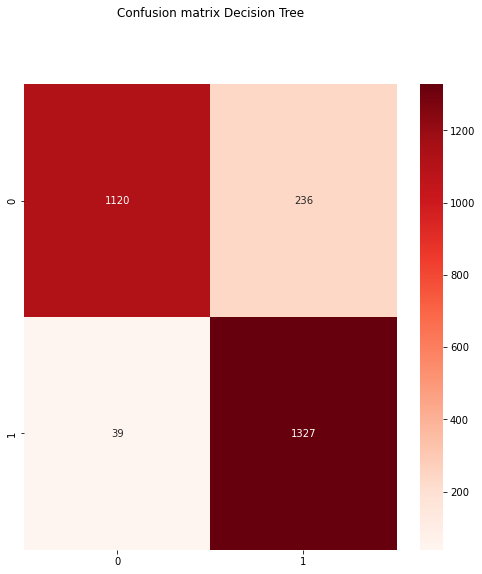

In [84]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y1_test, normalized_data2_dtc_pred)
ax = plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

<h2>5.Naive Bayesian Classification</h2>

In [85]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X1_train,y1_train)
pred_rand= model.predict(X1_test)
accrf=accuracy_score(y1_test, pred_rand)
print(f"Accuracy of Naive Bayesian is: {round(accrf,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1rf = f1_score(y1_test, pred_rand)
print(f"The f1 score for Naive Bayesian is: {round(f1rf,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionrf = precision_score(y1_test,pred_rand)
print(f"The precision score for Naive Bayesian is: {round(precisionrf,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallrf = recall_score(y1_test, pred_rand)
print(f"The recall score for Naive Bayesian is: {round(recallrf,3)*100}%")

Accuracy of Naive Bayesian is: 62.5%
The f1 score for Naive Bayesian is: 55.00000000000001%
The precision score for Naive Bayesian is: 69.19999999999999%
The recall score for Naive Bayesian is: 45.7%


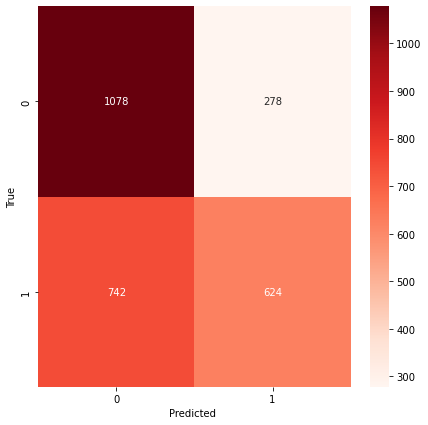

In [86]:
# plotting confusion matrix Naive Bayesian

cnf_matrix_bayesian = confusion_matrix(y1_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_bayesian), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

<h2><b>6.RANDOM FOREST</b><h2>

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X1_test)
clf.fit(X1_train,y1_train)

pred_rand=clf.predict(X1_test)
print("Accuracy of Random Forest is:",metrics.accuracy_score(y1_test, pred_rand)*100)

Accuracy of Random Forest is: 94.121969140338


In [88]:
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
accrand = accuracy_score(y1_test, pred_rand)
print(f"The accuracy score for Random Forest is: {round(accrand,3)*100}%")
# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1rand = f1_score(y1_test, pred_rand)
print(f"The f1 score for Random Forest is: {round(f1rand,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precisionrand = precision_score(y1_test, pred_rand)
print(f"The precision score for Random Forest is: {round(precisionrand,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recallrand = recall_score(y1_test, pred_rand)
print(f"The recall score for Random Forest is: {round(recallrand,3)*100}%")

The accuracy score for Random Forest is: 94.1%
The f1 score for Random Forest is: 94.3%
The precision score for Random Forest is: 91.60000000000001%
The recall score for Random Forest is: 97.2%


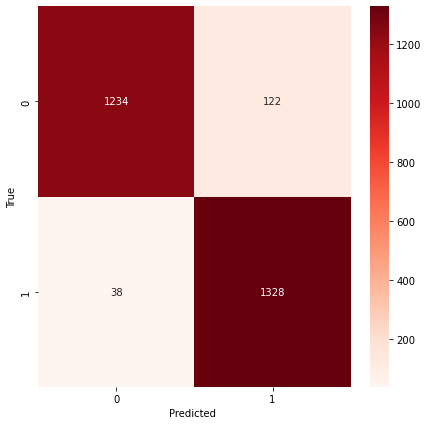

In [89]:
# plotting confusion matrix Random Forest

cnf_matrix_random = confusion_matrix(y1_test, pred_rand)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_random), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True');

<b>As random forest is giving highest accuracy and f1 we also check with cross validation mehord.</b>
<b>It is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set</b>

<h2>CROSS VALIDATION<h2>

In [90]:
cv_results = cross_val_score(clf, X1, y1, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.95885378 0.96693608 0.96693608 0.96473181 0.97205882]
The Accuracy of Model with Cross Validation is: 96.59%


In [91]:
scores = {'Model':['Logistic Regression','KNN','Decission Tree','Svm','Naive Bayesian Classification','Random Forest'],'F1-Score':['%0.2f'%(f1log*100),'%0.2f'%(knn_f1*100),'%0.2f'%(f1dt*100),'%0.2f'%(f1svm*100),'%0.2f'%(f1rf*100),'%0.2f'%(f1rand*100)],'Accuracy':['%0.2f'%(acclog*100),'%0.2f'%(knn_acc*100),'%0.2f'%(accdt*100),'%0.2f'%(accsvm*100),'%0.2f'%(accrf*100),'%0.2f'%(accrand*100)],'Recall':['%0.2f'%(recalllog*100),'%0.2f'%(knn_recall*100),'%0.2f'%(recalldt*100),'%0.2f'%(recallsvm*100),'%0.2f'%(recallrf*100),'%0.2f'%(recallrand*100)]}

Scores = pd.DataFrame(scores,columns=['Model','F1-Score','Accuracy','Recall'])
print("The Scores Obtained from the above applied Machine Learning Algorithms :")
Scores

The Scores Obtained from the above applied Machine Learning Algorithms :


,Model,F1-Score,Accuracy,Recall
0,Logistic Regression,66.13,66.16,65.81
1,KNN,84.18,82.51,92.68
2,Decission Tree,90.61,89.90,97.14
3,Svm,67.75,67.19,68.67
4,Naive Bayesian Classification,55.03,62.53,45.68
5,Random Forest,94.32,94.12,97.22


<h2>From cross validation result and the F1 score and accuracy of the models we conclude that Random Forest model is better because:<br></h2>
    
* It runs efficiently on large databases.<br>
* It can handle thousands of input variables without variable deletion.<br>
* It gives estimates of what variables are important in the classification<br>

Also<br>

 * If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting which doesnot occur in Random Forest<br>
    
 * Random forests are a strong modeling technique and much more robust than a single decision tree. They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.<br>
    
* Random Forest is intrinsically suited for multiclass problems, while SVM is intrinsically two-class. For multiclass problem you will need to reduce it into multiple binary classification problems.<br>
    
* We have to determine the value of parameter K (number of nearest neighbors) in KNN and the type of distance to be used. The computation time is also very much as we need to compute distance of each query instance to all training samples which is not required in Random forest<br>

## Result: *Random Forest has the highest f1 score and it is clearly better to choose it for classification. Second choice would be to use Decision Tree.*